# Notebook de Visualizaciones varias

Siempre es importante poder visualizar datos, como seguramente ya habréis visto en otras asignaturas. Aquí no es tan obvio como quizás en imágenes o otros tipos de datos como visualizarlos, pero aún y así hay formas de hacerlo.

Dicho esto sera un paseo breve de visualización, y poco más.

In [1]:
!pip install stop_words

  Cache entry deserialization failed, entry ignored
  Using cached https://files.pythonhosted.org/packages/60/7f/8dee73924e2cb06a223523dd661856e9b32b17202bf9c20c77de2c154d72/stop-words-2015.2.23.1.tar.gz
  Running setup.py bdist_wheel for stop-words ... - \ done
  Stored in directory: /content/.cache/pip/wheels/d3/60/7e/bc83ee0496b334c47a572d498f029dc7be23a96a7166187885
Successfully built stop-words


In [3]:
!pip install tqdm

  Cache entry deserialization failed, entry ignored
  Using cached https://files.pythonhosted.org/packages/93/24/6ab1df969db228aed36a648a8959d1027099ce45fad67532b9673d533318/tqdm-4.23.4-py2.py3-none-any.whl


In [0]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
import matplotlib.pyplot as plt


import numpy as np

import os

import glob
import re
from string import punctuation
import pandas as pd
import operator
from collections import Counter, defaultdict
import seaborn as sns

from stop_words import get_stop_words
stop_words = get_stop_words('es')


from tqdm import tqdm
import io

chars = "\\`*_{}[]()<>#+-.!$/,"

In [5]:
'la' in stop_words

True

In [0]:
import random
def sample_distribution(distribution, samples=10):
    return random.sample(distribution, samples)

def heatmap_counter(word_distribution, label_sorted_by_id, word_sorted_by_id):
    sns.heatmap(word_distribution, xticklabels=label_sorted_by_id, yticklabels=word_sorted_by_id)

def barplot_counter(counter_plot, axis=None, title=None, percentage=False):
    mpl.rcParams['figure.figsize'] = (17, 5)
    if isinstance(counter_plot, dict):
        x,y = zip(*[(i,j) for i, j in counter_plot.items()]) 
        x=list(x)
        y=list(y)
    else:
        x = [t[0] for t in counter_plot]
        y = [t[1] for t in counter_plot]
    
    if percentage:
        y=[ele/sum(list(y)) for ele in y]
        
    if title:
        g = sns.barplot(x=x, y=y, palette="BuGn_d")
        g.set_title(title)
    else:
        g = sns.barplot(x=x, y=y, palette="BuGn_d")
        
    g.set_xticklabels(g.get_xticklabels(), rotation="vertical")
    sns.plt.show()
    
def generate_word_distribution(texts, labels, max_c=10):
    word_distribution = np.zeros(shape=(len(max_c), len(labels)))
    print(word_distribution.shape)
    for key, text_list in texts.items():
        for sentence in text_list:
            for w in sentence.split(' '):
                if w not in stop_words and w in most_c and type(u[2])==str:
                    word_distribution[w_id[w], label_idx[u[2].lower()]]+=1
    return word_distribution

def generate_word_counter(list_sentences, normalize=True):
    word_c = Counter()
    for sentence in list_sentences:
        word_c.update(sentence.rstrip('\n').split(' '))
    total = sum([v for v in word_c.values()])
    if normalize:
        for w, c in word_c.items():
            word_c[w] = c/float(total)
    return word_c
            
            

In [8]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving becquer.txt to becquer (1).txt
Saving bolivar.txt to bolivar (1).txt
Saving cocina.txt to cocina (1).txt
Saving ludovico.txt to ludovico (1).txt
Saving quijote.txt to quijote (1).txt
User uploaded file "becquer.txt" with length 558879 bytes
User uploaded file "bolivar.txt" with length 142606 bytes
User uploaded file "cocina.txt" with length 459594 bytes
User uploaded file "ludovico.txt" with length 980616 bytes
User uploaded file "quijote.txt" with length 2099962 bytes


In [17]:

texts = {}
for fname, file in tqdm(uploaded.items(), desc='reading files'):
    f = io.StringIO(file.decode('utf-8'))
    label = fname.split('.')[0]
    texts[label] = []
    for line in f.readlines():
        texts[label].append(line)

reading files: 100%|██████████| 5/5 [00:00<00:00, 103.53it/s]


In [18]:
print(texts.keys())

dict_keys(['becquer', 'bolivar', 'cocina', 'ludovico', 'quijote'])


In [19]:
for k, vlist in texts.items():
    print(k, ': ',len(vlist))

becquer :  11632
bolivar :  1498
cocina :  11038
ludovico :  16141
quijote :  36672


In [0]:
word_counter_label = {}
for k, v_list in texts.items():
    word_counter_label[k] = generate_word_counter(v_list, normalize=True)
    
tokens = []
dialogues = []
for label, text in texts.items():
    for line in text:
        for word in line.rstrip('\n').split(' '):
            tokens.append(word)
        dialogues.append((0, line.rstrip('\n'), label))
word_relevance = Counter(tokens)

In [21]:
nb_tokens_label = {}
for k, vlist in texts.items():
    nb_tokens_label[k] = sum([len(sentence.split(' ')) for sentence in vlist])
    print('{} : {}'.format(k, nb_tokens_label[k]))
    

becquer : 104579
bolivar : 26466
cocina : 83137
ludovico : 170998
quijote : 382874


In [39]:
mpl.rcParams['figure.figsize'] = (20, 15)

most_c = [w.rstrip(punctuation).lower() for w, c in word_relevance.most_common() if w.rstrip(punctuation).lower() not in stop_words and len(w.rstrip(punctuation).lower())>1][:60]

w_id = {w:i for i, w in enumerate(most_c)}
id_w = {i:w for w, i in w_id.items()}
word_sorted_by_id = [s[0] for s in sorted(w_id.items(), key=operator.itemgetter(1))]

labels = list(set(texts.keys()))
idx_labels = {i:l for i, l in enumerate(labels)}
label_idx = {i:l for l, i in idx_labels.items()}
label_sorted_by_id = [s[0] for s in sorted(label_idx.items(), key=operator.itemgetter(1))]
                                          
word_distribution = np.zeros(shape=(len(most_c), len(labels)))
print(word_distribution.shape)
for u in dialogues:
    for w in u[1].split(' '):
        ww = w.rstrip(punctuation).lower()
        if ww not in stop_words and ww != '':
            if ww in most_c:
                word_distribution[w_id[ww], label_idx[u[2].lower()]]+=1

normalize = True                
if normalize:
    for k, nb_tokens in nb_tokens_label.items():
        word_distribution[:,label_idx[k]]/=float(nb_tokens)

(60, 5)


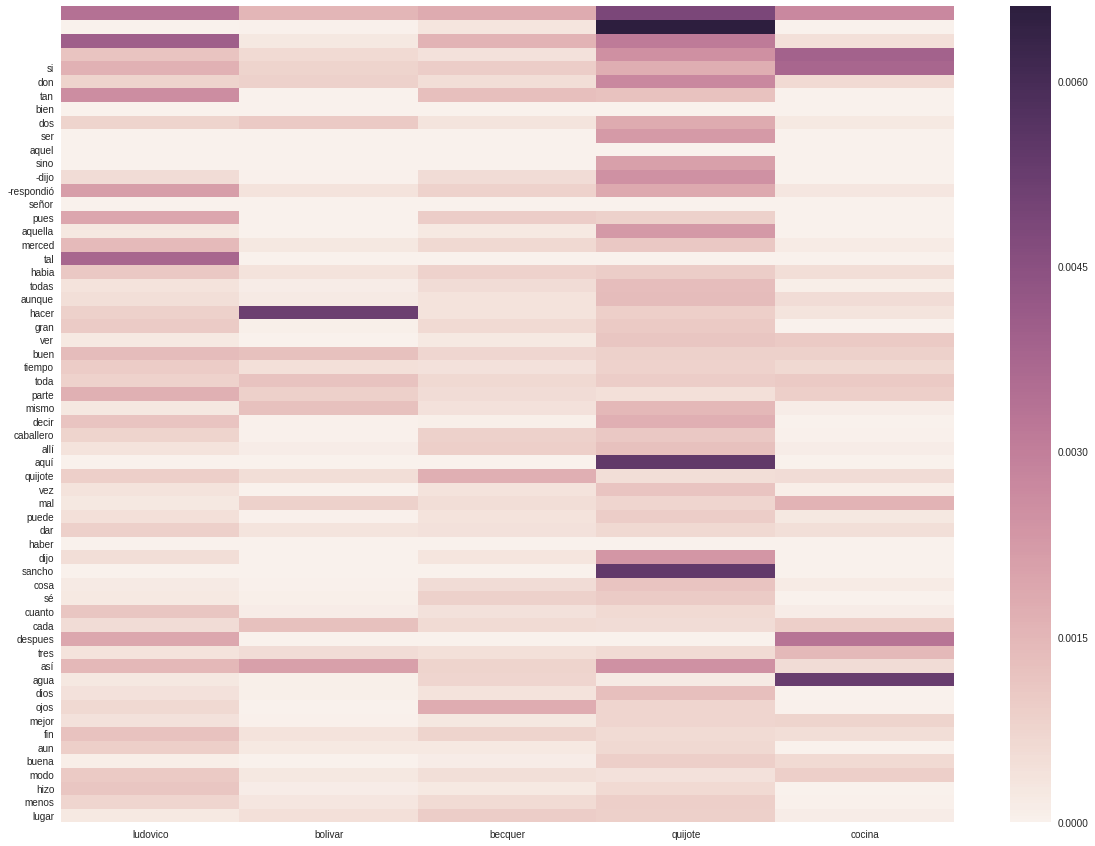

In [40]:
heatmap_counter(word_distribution, label_sorted_by_id, word_sorted_by_id)

In [24]:
most_common_max = 100
most_common_generic = set()
for k, v in word_counter_label.items():
    tmp = set([w.rstrip(punctuation).lower() for w, c in v.most_common() if w.rstrip(punctuation).lower() not in stop_words and w.rstrip(punctuation).lower() not in ['', '\n'] and len(w.rstrip(punctuation).lower())>1][:20])
    most_common_generic = most_common_generic.union(tmp)
most_common_generic = list(most_common_generic)
print(most_common_generic)

['día', 'vez', 'sino', 'ojos', 'lugar', 'proceso', 'aún', 'fuego', 'hizo', 'años', 'añade', 'manteca', 'mano', 'hácia', 'decir', 'todas', 'año', 'punto', 'hacer', 'sólo', 'tal', 'historia', 'ser', 'así', 'fué', 'tres', 'núcleo', 'cacerola', 'si', 'periodo', 'señor', 'don', 'ciclo', 'matemático', 'quijote', 'caldo', 'sé', 'matemática', 'mismo', 'rey', 'segundo', '-respondió', 'cocer', 'época', 'aquella', 'cuanto', 'fin', 'solo', 'aunque', 'aquel', 'sancho', 'ponen', 'agua', 'salsa', 'pues', 'pone', 'dos', 'tiempo', 'sirve', 'después', 'pueblos', 'bien', 'noche', 'imperio', 'voz', 'carne', 'gran', '-dijo', 'tan', 'victorias', 'grandes', 'merced', 'despues', 'fondo', 'guerra', 'habia', 'primer', 'luz', 'fase', 'sal', 'echa']


In [42]:
w_id = {w:i for i, w in enumerate(most_common_generic)}
id_w = {i:w for w, i in w_id.items()}
word_sorted_by_id = [s[0] for s in sorted(w_id.items(), key=operator.itemgetter(1))]

labels = list(set(texts.keys()))
idx_labels = {i:l for i, l in enumerate(labels)}
label_idx = {i:l for l, i in idx_labels.items()}
label_sorted_by_id = [s[0] for s in sorted(label_idx.items(), key=operator.itemgetter(1))]
                                          
word_distribution = np.zeros(shape=(len(most_common_generic), len(labels)))
print(word_distribution.shape)
for u in dialogues:
    for w in u[1].split(' '):
        ww = w.rstrip(punctuation).lower()
        if ww not in stop_words and ww != '':
            if ww in most_common_generic:
                word_distribution[w_id[ww], label_idx[u[2].lower()]]+=1
                
normalize = True                
if normalize:
    for k, nb_tokens in nb_tokens_label.items():
        word_distribution[:,label_idx[k]]/=float(nb_tokens)

(81, 5)


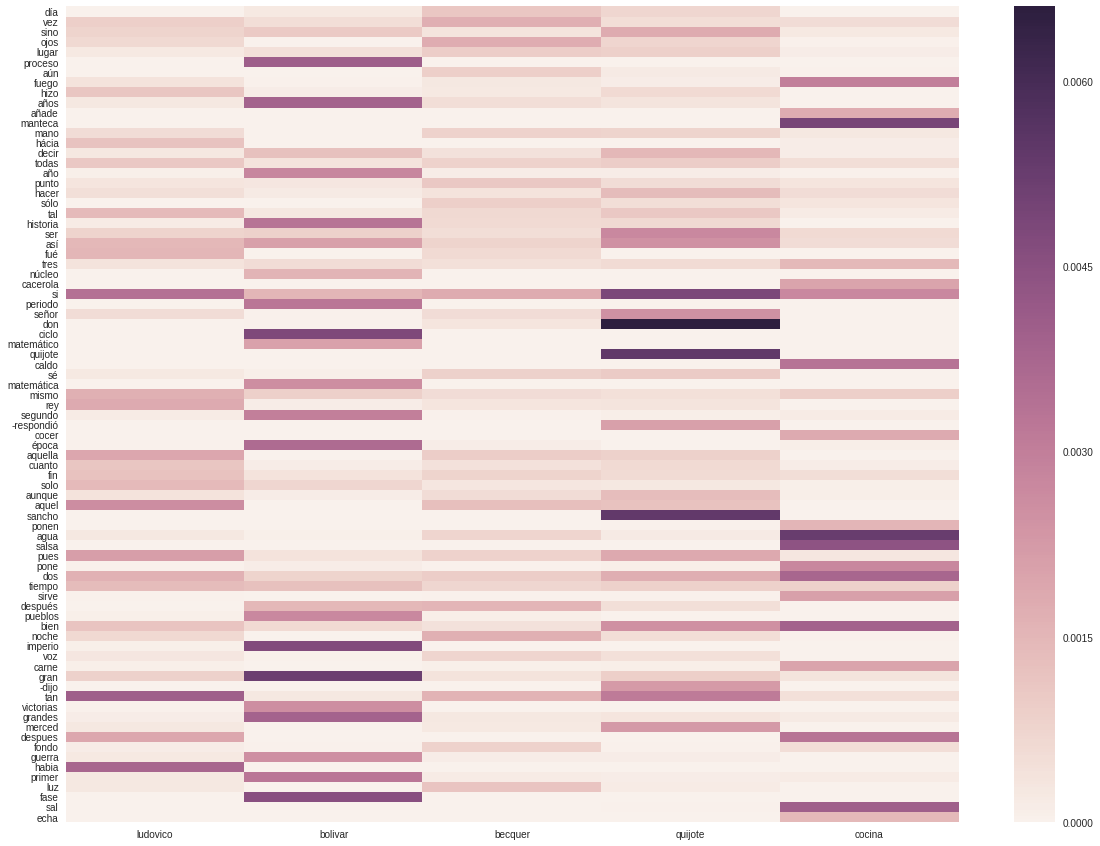

In [43]:
heatmap_counter(word_distribution, label_sorted_by_id, word_sorted_by_id)

### Distribución de palabras

Todas las palabras aparecen por igual?

In [0]:
import string

exclude = set(string.punctuation)

In [75]:
tokens_label = {}
for k, vlist in texts.items():
    tokens_label[k] = [''.join(ch for ch in t if ch not in exclude) for sentence in vlist for t in sentence.split(' ')]
    print('{} : {}'.format(k, len(tokens_label[k])))

becquer : 104579
bolivar : 26466
cocina : 83137
ludovico : 170998
quijote : 382874


In [0]:
cocina_counter = Counter(tokens_label['cocina'])
sorted_counter = cocina_counter.most_common()
pos_zipf = {}
for p, (_,count) in enumerate(sorted_counter):
    if count not in pos_zipf:
        pos_zipf[count]=len(pos_zipf)
        
len(pos_zipf), len(sorted_counter)
inverse_freq = [(w, count, count/float(pos_zipf[count]+1)) for pos, (w, count) in enumerate(sorted_counter)]

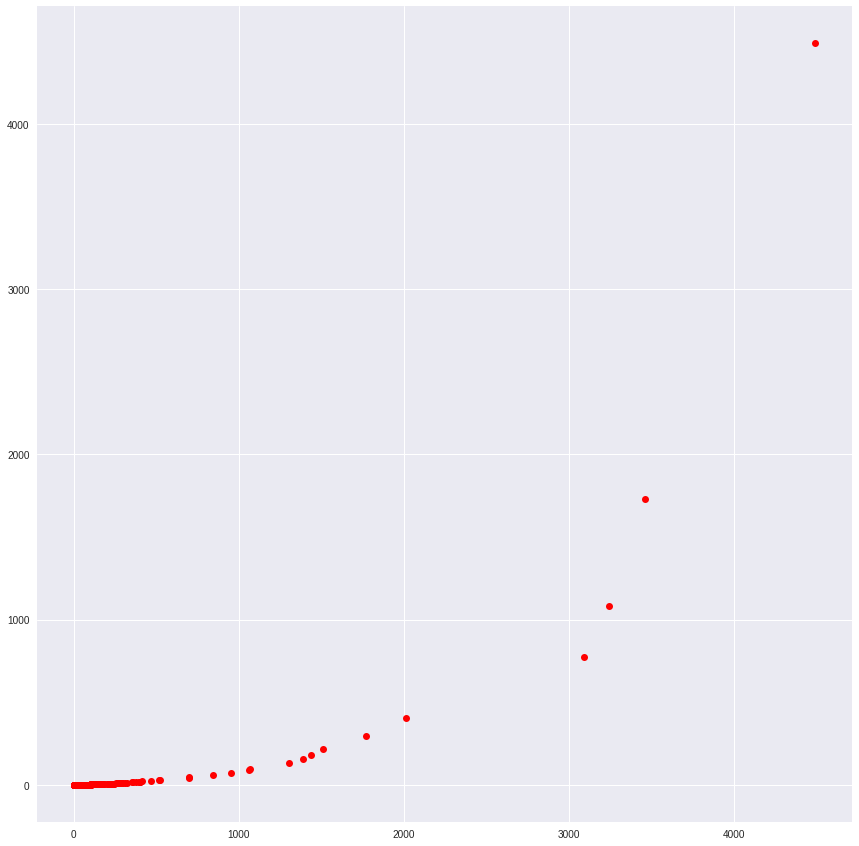

In [90]:
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (20, 15)

_, x, y = zip(*inverse_freq)

plt.plot(x, y, 'ro')
plt.axis('scaled')
plt.show()

In [0]:
q_counter = Counter(tokens_label['quijote'])
sorted_counter = q_counter.most_common()
pos_zipf = {}
for p, (_,count) in enumerate(sorted_counter):
    if count not in pos_zipf:
        pos_zipf[count]=len(pos_zipf)
        
len(pos_zipf), len(sorted_counter)
inverse_freq = [(w, count, count/float(pos_zipf[count]+1)) for pos, (w, count) in enumerate(sorted_counter)]

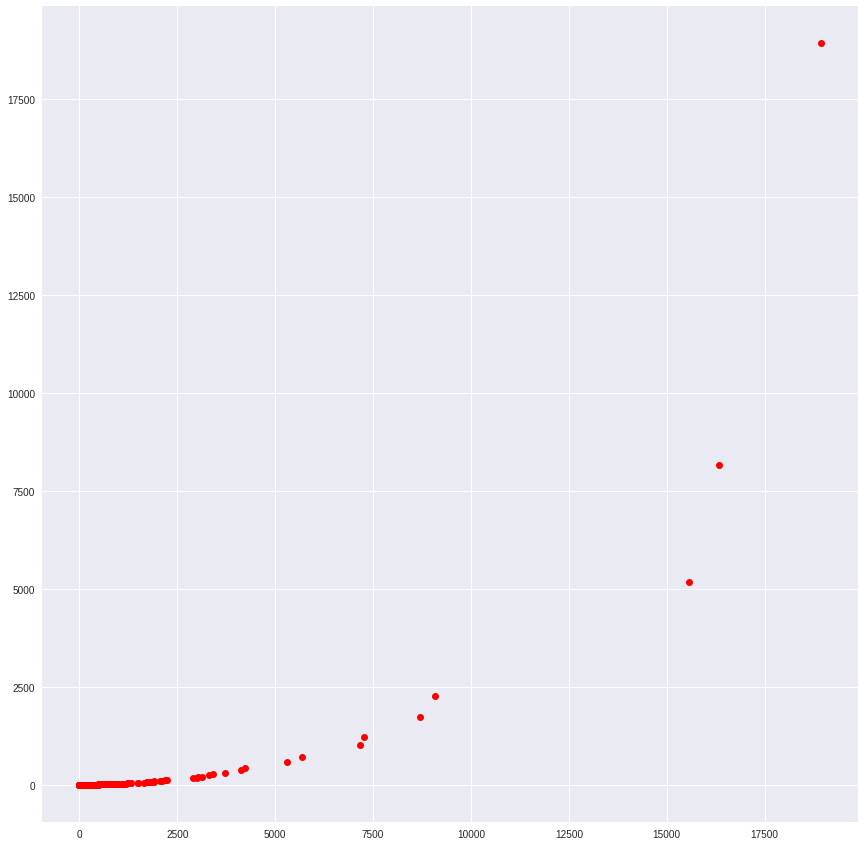

In [92]:
mpl.rcParams['figure.figsize'] = (20, 15)

_, x, y = zip(*inverse_freq)

plt.plot(x, y, 'ro')
plt.axis('scaled')
plt.show()